# FordGoBike Dataset
## by Sultan Alrajhi

## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import zipfile
import os
import datetime as dt

%matplotlib inline

### Gathering

In [2]:
#reading csv file
df = pd.read_csv('2017-fordgobike-tripdata.csv')

### Assessing

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [4]:
df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
413906,249,2017-08-23 22:42:34.6110,2017-08-23 22:46:44.5530,163,Lake Merritt BART Station,37.797320,-122.265320,186,Lakeside Dr at 14th St,37.801319,-122.262642,1268,Subscriber
299319,257,2017-09-28 13:48:54.7190,2017-09-28 13:53:12.6300,70,Central Ave at Fell St,37.773311,-122.444293,71,Broderick St at Oak St,37.773063,-122.439078,3149,Customer
388057,969,2017-09-01 14:26:30.1370,2017-09-01 14:42:39.9440,116,Mississippi St at 17th St,37.764802,-122.394771,28,The Embarcadero at Bryant St,37.787168,-122.388098,2749,Subscriber
129456,296,2017-11-15 18:12:50.6800,2017-11-15 18:17:47.0500,323,Broadway at Kearny,37.798014,-122.405950,6,The Embarcadero at Sansome St,37.804770,-122.403234,1127,Subscriber
328120,492,2017-09-20 10:33:10.3000,2017-09-20 10:41:23.0190,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,10,Washington St at Kearny St,37.795393,-122.404770,1371,Subscriber
285454,467,2017-10-02 18:33:35.8490,2017-10-02 18:41:23.7270,323,Broadway at Kearny,37.798014,-122.405950,22,Howard St at Beale St,37.789756,-122.394643,3076,Subscriber
352294,1152,2017-09-13 09:35:58.8810,2017-09-13 09:55:11.4820,112,Harrison St at 17th St,37.763847,-122.413004,24,Spear St at Folsom St,37.789677,-122.390428,2160,Customer
400419,331,2017-08-28 19:28:24.1420,2017-08-28 19:33:55.5620,134,Valencia St at 24th St,37.752428,-122.420628,123,Folsom St at 19th St,37.760594,-122.414817,2525,Subscriber
292356,1328,2017-09-30 14:07:12.6740,2017-09-30 14:29:20.9090,10,Washington St at Kearny St,37.795393,-122.404770,36,Folsom St at 3rd St,37.783830,-122.398870,1689,Customer
167714,882,2017-11-05 08:12:39.9620,2017-11-05 08:27:22.0040,139,Garfield Square (25th St at Harrison St),37.751017,-122.411901,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,2883,Customer


In [5]:
#number of rows and column
df.shape

(519700, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


In [7]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000


In [8]:
#Checking for missing values
df.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
dtype: int64

In [9]:
#checking for duplicates
df.duplicated().sum()

0

### Cleaning

- convert start_time , end_time to datetime variable
- convert user_type to category
- extracting the start time data to hours, days, month for better visualization

In [10]:
#make a copy of the dataset
df_clean = df.copy()

##### Define
convert start_time , end_time to datetime variable

##### Code

In [11]:
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

##### Test

In [12]:
df_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                    int64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                      int64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
dtype: object

##### Define
convert user_type to category

##### Code

In [13]:
df_clean.user_type = df_clean.user_type.astype('category')

##### Test

In [14]:
df_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                    int64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                      int64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
dtype: object

##### Define
extracting the start time to hours, days, month

##### Code

In [15]:
df_clean['start_hour'] = df_clean['start_time'].dt.hour

In [16]:
df_clean['start_day'] = df_clean['start_time'].dt.strftime('%a')

In [17]:
df_clean['start_month'] = df_clean['start_time'].dt.month_name()

In [18]:
df_clean['duration_min']=df_clean['duration_sec']/60

##### Test

In [19]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,start_hour,start_day,start_month,duration_min
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,16,Sun,December,1335.166667
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,15,Sun,December,1313.333333
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,22,Sun,December,762.800000
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,17,Sun,December,1036.200000
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,14,Sun,December,726.716667


In [20]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  int64         
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  int64         
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  int64         
 12  user_type       

### What is the structure of your dataset?

> There are 519700 records of bike trips in 2017, these trips depends on
Trip Duration
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type
- start_hour              
- start_day                      
- start_month           
- duration_min  

### What is/are the main feature(s) of interest in your dataset?

> The main feature is the user type.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> That there is no missing data in the dataset.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

## Q1:
Is the service Used all day?

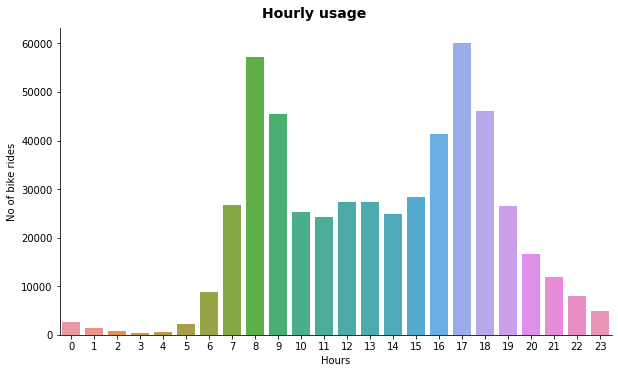

In [21]:
usage = sb.catplot(data=df_clean, x='start_hour', kind='count', aspect=1.7)
usage.set_axis_labels("Hours", "No of bike rides")
usage.fig.suptitle('Hourly usage ', y=1.03, fontsize=14, fontweight='semibold');

At 8 people go to work or school, at 17 people finish their work. In my opinion thats what make these times busy.

## Q2:
what is the most and the least months in the year?

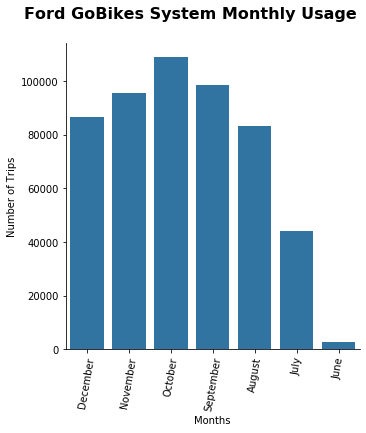

In [22]:
base_color = sb.color_palette()[0]  
graph = sb.catplot(data=df_clean, x='start_month',                 
                   kind='count',color = base_color)
graph.set_axis_labels('Months', 'Number of Trips')
graph.fig.suptitle('Ford GoBikes System Monthly Usage',
                   y=1.07, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=80);

October is the most month usage, I think because the best weather in the year is on october.

## Q3:
What is the highest duration frequency of bike rides?

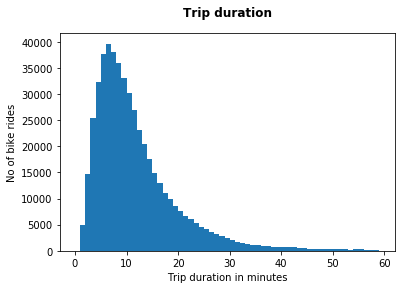

In [23]:
bin_edges = np.arange(0,60,1)
plt.hist(data = df_clean, x = 'duration_min', bins = bin_edges)
plt.title("Trip duration", y=1.05, fontsize=12, fontweight='semibold')
plt.xlabel('Trip duration in minutes')
plt.ylabel('No of bike rides');

The histogram peaks at around 10 minutes.
As the trip duration increases the number of trips decreases.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> No there isn't any unusual point, but I saw that as the duration increase the number of rides decreases.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes I have, I changed the duration_sec to duration_min to make it understandable, and I added start hour, start day, start month for better exploration

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

## Q1:
Who makes the largest proportion of users?

In [24]:
customer = df_clean.query('user_type == "Customer"')['bike_id'].count()
subscriber = df_clean.query('user_type == "Subscriber"')['bike_id'].count()
customer_prop = customer / df_clean['bike_id'].count()
subscriber_prop = subscriber / df_clean['bike_id'].count()

https://pythonspot.com/matplotlib-pie-chart/

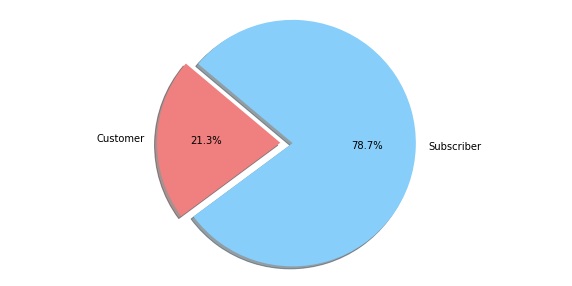

In [25]:
plt.figure(figsize = [10, 5])

labels = ['Customer', 'Subscriber']
sizes = [customer, subscriber]
colors = ['lightcoral', 'lightskyblue']
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

As shown Subscribers are the highest proportion with 78.7%, where Customers are 21.3%

## Q2:
which user type has more usage (duration)?

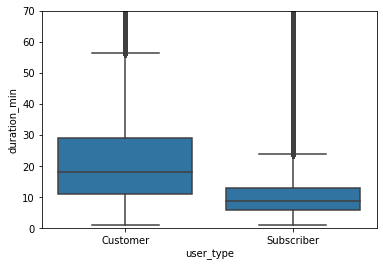

In [26]:
sb.boxplot(data=df_clean, x='user_type', y='duration_min', color=base_color);
plt.xlabel('user_type');
plt.ylabel('duration_min');
plt.ylim(0,70);

Customers has more duration than subscribers, thats because customers usually are visitors or tourists unlike subscribers which use the service for work.

## Q3:
How does the trend of bike usage differ by user type?

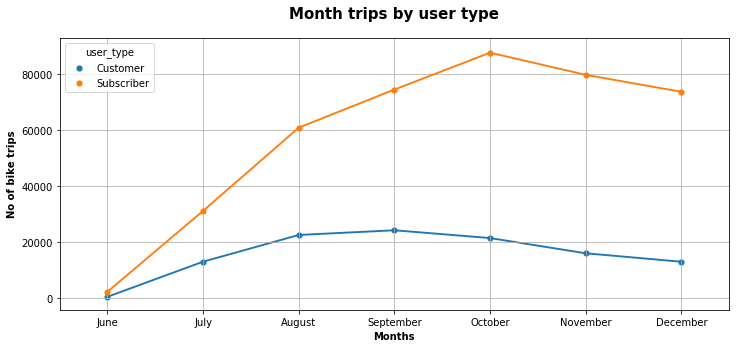

In [27]:
months = ['June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.figure(figsize=(12, 5))
month_trips = df_clean.groupby(['start_month', 'user_type']).size().reset_index()
ax = sb.pointplot(data=month_trips , x='start_month', y=0, hue = 'user_type', scale=.7, order= months);

plt.title('Month trips by user type', y=1.05, fontsize=15, fontweight='bold')
plt.xlabel('Months' , fontweight='bold');
plt.ylabel('No of bike trips', fontweight='bold');
plt.grid()

Customers tend to use bikes in summer. As we can see at August and
September is the most number of trips.
Subscribers usage at October and November.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> From the analysis above subscribers have higher usage than customers, but customers have longer duration which leads that they are riding for fun.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I think the relationship is straightforward, nothing unclear about the data so far.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

## Q1:
Comparing subscribers and customers weekly usage (Bike rides)

https://stackoverflow.com/questions/25068384/bbox-to-anchor-and-loc-in-matplotlib

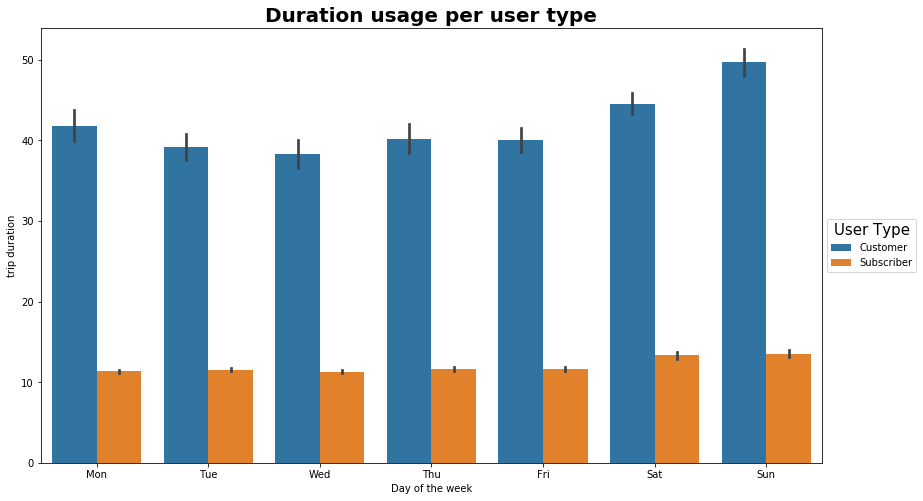

In [28]:
weekday =  ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.figure(figsize=[14 , 8])
sb.barplot(data=df_clean , x = 'start_day' , y = 'duration_min' , hue = 'user_type', order=weekday);
plt.xlabel('Day of the week')
plt.ylabel('trip duration')
plt.legend(loc ='center left' , bbox_to_anchor=(1,0.5) , title='User Type' , title_fontsize = 15);
plt.title('Duration usage per user type' , fontsize = 20 , fontweight = 'semibold');

Subscribers has consistent duration in the whole week, on the other hand customers have a higher variance. As we can see customers tend to have more duration in weekends.

## Q2:
Examinating customers vs subscribers hourly usage through the week

https://www.drawingfromdata.com/setting-figure-size-using-seaborn-and-matplotlib

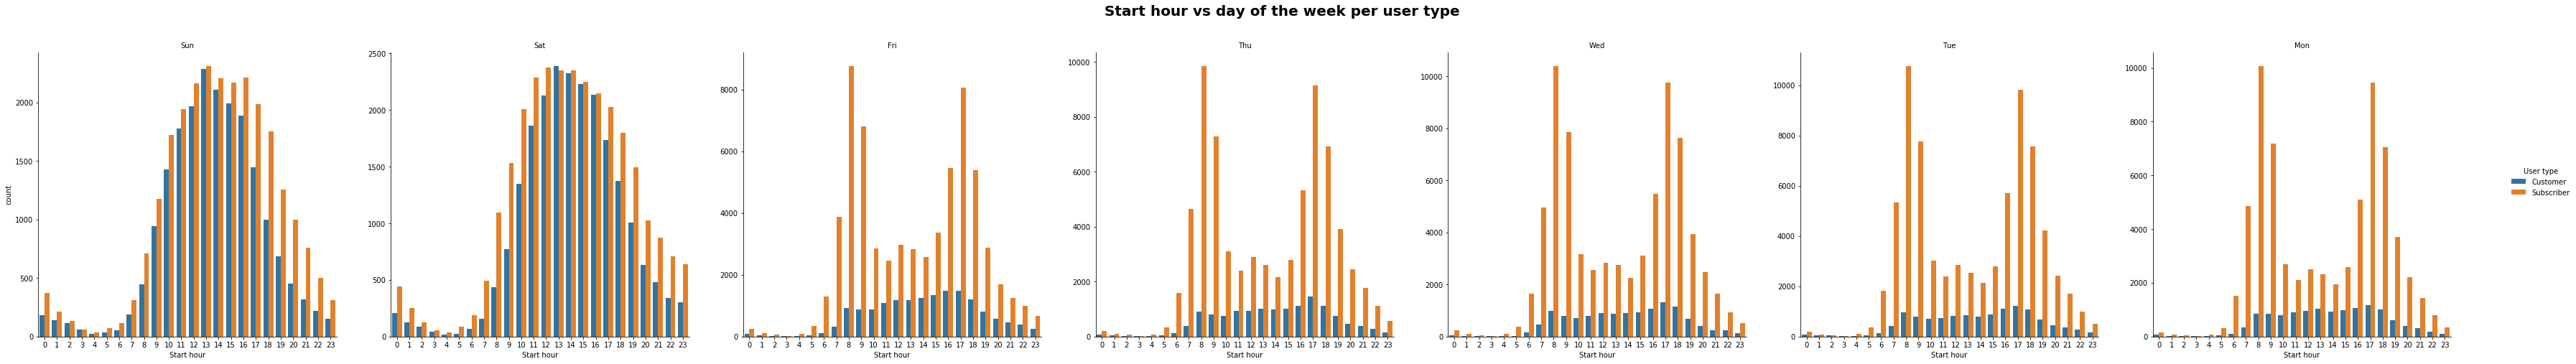

In [29]:
p = sb.catplot(data = df_clean, x = 'start_hour', col = 'start_day', hue = "user_type",height=3, aspect=1.5 ,kind = 'count', sharey = False)
p.fig.set_size_inches(50,8)
p.set_axis_labels("Start hour")
p._legend.set_title('User type')
p.set_titles("{col_name}")
plt.suptitle("Start hour vs day of the week per user type", y=1, fontsize=20,fontweight='bold')
plt.show()

Subscribers usage on monday to friday from 8-17 which suggests that they are going to work. Customers ride in the weekends from 10-16 which suggest that they are visitors

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> After examining the data closely, Customers usually have a longer duration trip than subscribers. For example subscribers on weekdays have peak hours in 8am and 5pm that made prove my points in the univariate section.


### Were there any interesting or surprising interactions between features?

> Yes i found it suprising that customers have much higher duration than subscribers even on the weekdays! Another suprising fact is that customers and subscribers have the same usage on weekends.

In [30]:
df_clean.to_csv('fordgobike.csv', index=False)